In [22]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
import statsmodels.formula.api as sm
import scipy
import scipy.stats as st
import seaborn as sns

In [26]:
order = [75,
         77,
         12,
         49,
         7,
         50,
         39,
         20,
         23,
         76,
         58,
         64,
         34,
         8,
         71,
         37,
         29,
         74,
         3,
         45,
         40,
         48,
         2,
         62,
         68,
         81,
         82,
         54,
         69,
         67,
         5,
         30,
         46,
         59,
         70,
         72,
         10,
         87,
         52,
         32,
         33,
         41,
         90,
         55,
         85,
         11,
         21,
         44,
         89,
         79,
         31,
         14,
         27,
         4,
         57,
         25,
         51,
         47,
         88,
         43,
         9,
         73,
         84,
         18,
         38,
         35,
         78,
         13,
         28,
         80,
         42,
         36,
         56,
         16,
         6,
         1,
         83,
         66,
         17,
         60,
         26,
         61,
         53,
         22,
         63,
         65,
         15,
         19,
         24,
         86]
continuous_features = [str(i) for i in range(25)]
data = pd.read_csv("merged.csv")
pose_data = pd.read_csv("merged_pose.csv")

for feature in continuous_features:
    # Sorting by original order while assigning
    data[feature] = pose_data[feature].values[[o-1 for o in order]]
print(data.head())

   Depression  Self-harm  Eye gaze  Distress (0) vs. Suicide (1)  Gender  Age  \
0           3          0         1                             0       0    1   
1           1          0         1                             0       1    0   
2           3          2         1                             1       0    0   
3           5          0         1                             0       1    0   
4           5          3         1                             1       0    1   

   Ethnicity  Short-term/Chronic distress  Crying  Hopelessness    ...      \
0  caucasian                            0       0             0    ...       
1    african                            0       0             0    ...       
2  caucasian                            1       1             0    ...       
3  caucasian                            0       1             1    ...       
4  caucasian                            1       1             1    ...       

          15         16         17         1

In [24]:
target = 'Distress (0) vs. Suicide (1)'
features = ['Depression', 'Self-harm', 'Eye gaze', 'Gender', 'Age', 'Ethnicity', 'Short-term/Chronic distress', 'Crying', 'Hopelessness', 'Anhedonia', 'Impulsiveness', 'Lability', 'Guilt', 'Entrapment', 'Social Alienation']
numerical_features = ['Depression', 'Self-harm', 'Eye gaze', 'Gender', 'Age', 'Short-term/Chronic distress', 'Crying', 'Hopelessness', 'Anhedonia', 'Impulsiveness', 'Lability', 'Guilt', 'Entrapment', 'Social Alienation']
#continuous_features = ['Depression']
column_headers = ['Depression', 'Self-harm', 'Eye gaze', 'Distress (0) vs. Suicide (1)', 'Gender', 'Age', 'Ethnicity', 'Short-term/Chronic distress', 'Crying', 'Hopelessness', 'Anhedonia', 'Impulsiveness', 'Lability', 'Guilt', 'Entrapment', 'Social Alienation']
np_data = data.values
#print(data)


In [4]:
# Present summary statistics for categorical variables
for var in column_headers:
    # Provide the count of observations in each category
    if var in continuous_features:
        continue
    print(data.groupby(var).size())
    print("")
    #TODO
    #pass

Depression
0     3
1    11
2     9
3    24
4    22
5    21
dtype: int64

Self-harm
0    54
1    21
2     7
3     8
dtype: int64

Eye gaze
0    18
1    72
dtype: int64

Distress (0) vs. Suicide (1)
0    60
1    30
dtype: int64

Gender
0    36
1    54
dtype: int64

Age
0    50
1    40
dtype: int64

Ethnicity
african                        3
african american               7
american                       9
american/norway                1
black                          4
british                        1
caucasian                     42
caucasian/african american     1
caucassian                     1
indian                         2
latin american                 1
white                         18
dtype: int64

Short-term/Chronic distress
0    64
1    26
dtype: int64

Crying
0    55
1    35
dtype: int64

Hopelessness
0    66
1    24
dtype: int64

Anhedonia
0    89
1     1
dtype: int64

Impulsiveness
0    87
1     3
dtype: int64

Lability
0    86
1     4
dtype: int64

Guilt
0    83
1     7

In [5]:

for var in continuous_features:
    print(data[var].describe())

count    90.000000
mean      8.466778
std       5.433345
min       0.000000
25%       4.522500
50%       8.705000
75%      12.360000
max      20.830000
Name: function, dtype: float64
count    90.000000
mean      2.044222
std       2.017535
min       0.000000
25%       0.647500
50%       1.715000
75%       3.057500
max      13.330000
Name: pronoun, dtype: float64
count    90.000000
mean     24.402333
std      10.794589
min       0.000000
25%      22.730000
50%      26.695000
75%      30.662500
max      42.530000
Name: verb, dtype: float64
count    90.000000
mean      7.516556
std       4.479001
min       0.000000
25%       5.355000
50%       7.440000
75%       9.805000
max      23.680000
Name: adj, dtype: float64
count    90.000000
mean      8.151000
std       5.761084
min       0.000000
25%       5.105000
50%       7.355000
75%      10.752500
max      33.330000
Name: posemo, dtype: float64
count    90.000000
mean      7.000000
std       4.586637
min       0.000000
25%       4.167500
50

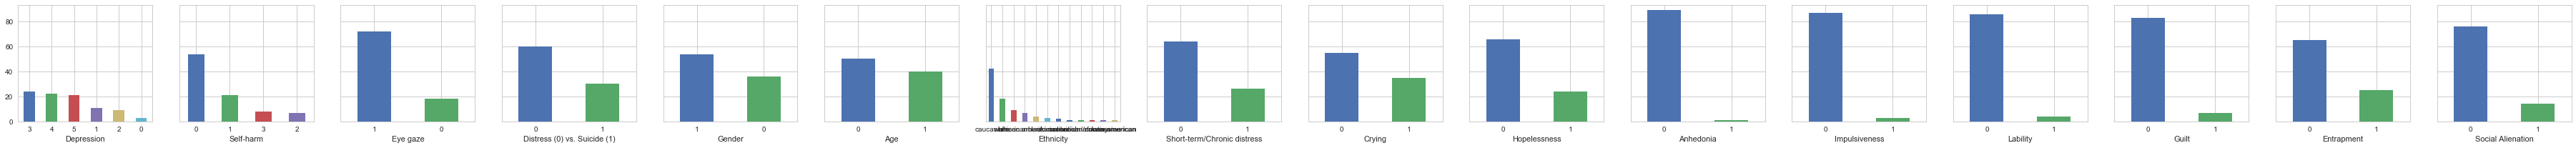

In [36]:
# visualize categorical variables

fig,ax = plt.subplots(
    1, len(column_headers), 
    figsize=(len(column_headers)*4, 3), 
    sharey=True,
)

for i,var in enumerate(column_headers):
    plt.sca(ax[i])
    ax[i].set_xlabel(var)
    ax[i] = data[var].value_counts().plot(kind='bar', rot=0)
    #TODO
    #pass


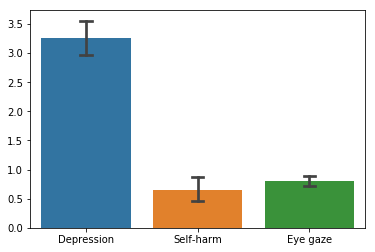

In [8]:
ax = sns.barplot( data=data.loc[:, :'Eye gaze'] , capsize=.1, ci=95)

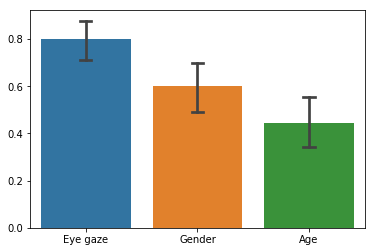

In [11]:
#ax = sns.barplot( data=data.loc[:, 'Eye gaze':'Ethnicity'] , capsize=.1, ci=95)
ax = sns.barplot( data=data.loc[:, ['Eye gaze', 'Gender', 'Age']] , capsize=.1, ci=95)

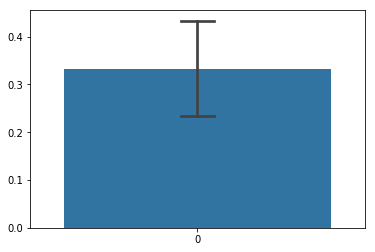

In [12]:
ax = sns.barplot( data=data.loc[:, 'Distress (0) vs. Suicide (1)'] , capsize=.1, ci=95)
                                
                                
                                

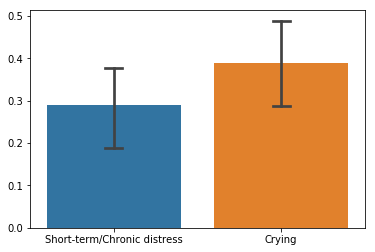

In [13]:
ax = sns.barplot( data=data.loc[:, 'Short-term/Chronic distress':'Crying'] , capsize=.1, ci=95)

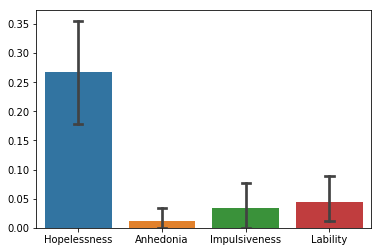

In [9]:
ax = sns.barplot( data=data.loc[:, 'Hopelessness':'Lability'] , capsize=.1, ci=95)

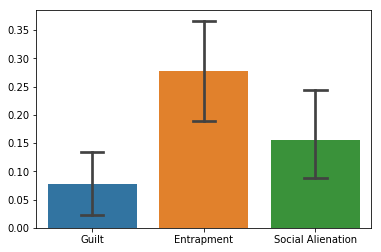

In [16]:
ax = sns.barplot( data=data.loc[:,  'Guilt':'Social Alienation'] , capsize=.2, ci=95)

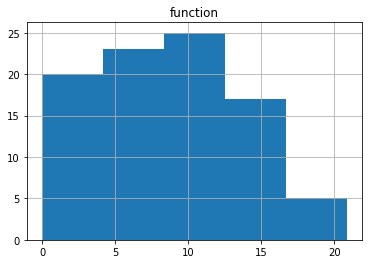

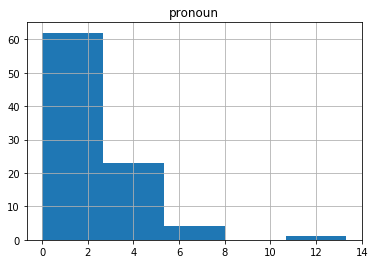

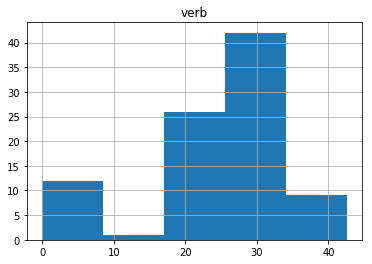

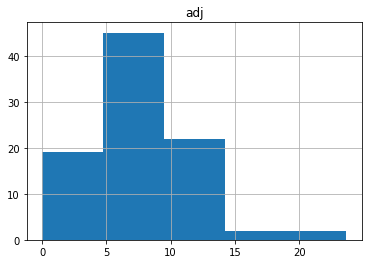

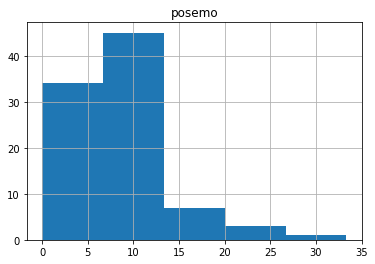

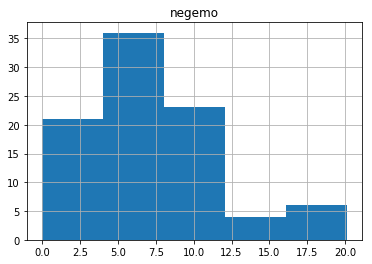

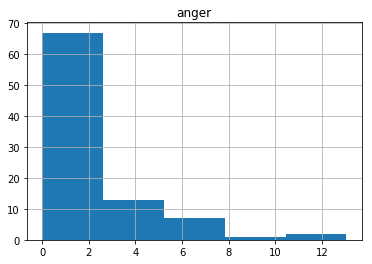

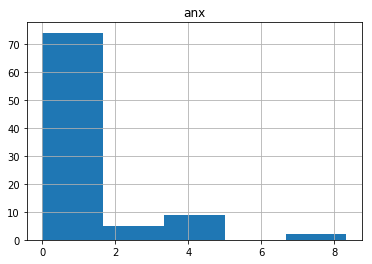

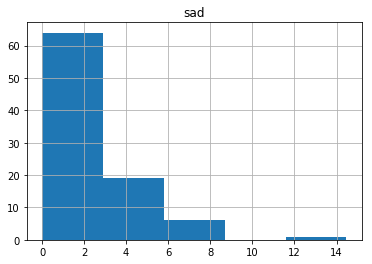

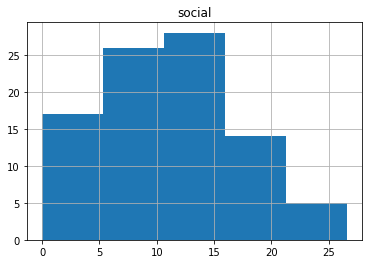

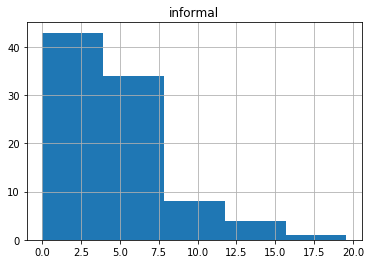

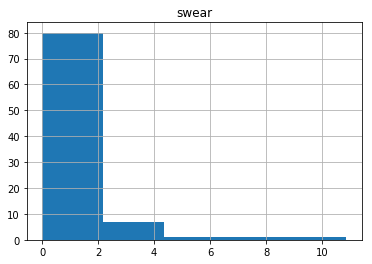

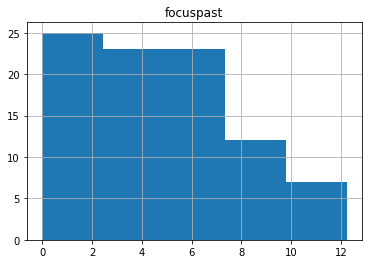

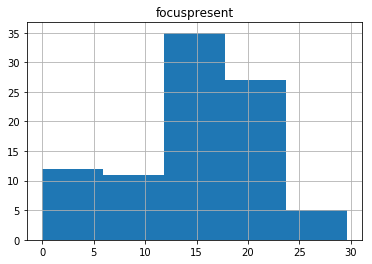

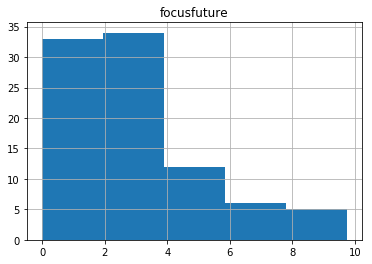

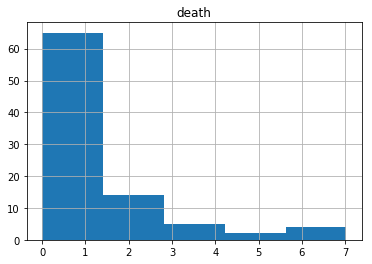

In [10]:
#Visualize continuous variables
for i, var in enumerate(continuous_features):
    data.hist(column=var, bins=5)

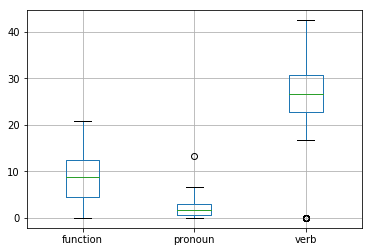

In [11]:
#Visualize continuous variables
data.boxplot(column=continuous_features[:3])

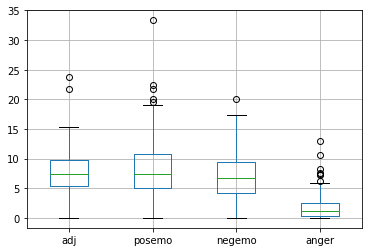

In [12]:
#Visualize continuous variables
data.boxplot(column=continuous_features[3:7])

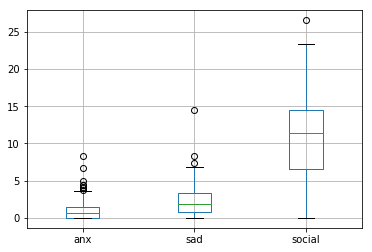

In [14]:
#Visualize continuous variables
data.boxplot(column=continuous_features[7:10])

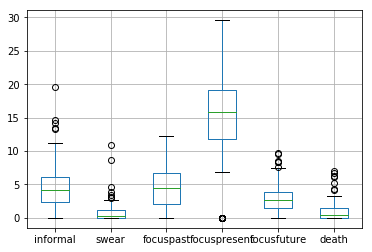

In [15]:
data.boxplot(column=continuous_features[10:])

In [19]:
def bootstrap_ci_arg(x, func=np.mean, feature=None, nboot=2000, interval=0.95, *args, **kwargs):
    """
    Perform nonparametric bootstrap and estimate percentile CI 
    Returns the sample estimate for func 
    and the interval% confidence interval for func
    
    """
    f_val = np.zeros(nboot)
    for i in range(nboot):
        #f_val[i] = x.sample(n=x.shape[0], replace=True, random_state=i).mean()
        if feature == None:
            f_val[i] = func(x.sample(n=x.shape[0], replace=True, random_state=i))
        else:
            f_val[i] = func(x.sample(n=x.shape[0], replace=True, random_state=i), feature=feature)
    #TODO
    #m, ci_l, ci_h = mean_confidence_interval(f_val, interval)
    m = np.median(f_val)
    ci_l = np.percentile(f_val, 2.5)
    ci_h = np.percentile(f_val, 97.5)
    #ci_l, ci_h = sm.DescrStatsW(f_val).tconfint_mean()
    #ci_l, ci_h  = st.t.interval(0.95, len(f_val)-1, loc=np.mean(f_val), scale=st.sem(f_val))
    return  m, ci_l, ci_h, f_val

In [20]:
def standardized_mean_diff(df, feature='Depression', target='Distress (0) vs. Suicide (1)', mean=np.nanmean, std=np.nanstd):
    #TODO
    mean1 = mean(df[df[target] == 0][feature])
    std1 = std(df[df[target] == 0][feature])
    mean2 = mean(df[df[target] == 1][feature])
    std_diff = (mean1 - mean2)/std1
    return std_diff

def mean_diff(df, feature='Depression', target='Distress (0) vs. Suicide (1)', mean=np.nanmean, std=np.nanstd):
    #TODO
    mean1 = mean(df[df[target] == 0][feature])
    mean2 = mean(df[df[target] == 1][feature])
    mean_diff = (mean1 - mean2)
    return mean_diff

In [34]:
# calculate the count of each numerical variable for the 2 target classes
target='Crying'
tot_features = continuous_features
for feature in tot_features:
    df = data.loc[:, [feature, target]]
    print(df.groupby(target).agg([np.mean]))

                              function
                                  mean
Distress (0) vs. Suicide (1)          
0                             9.042500
1                             7.315333
                               pronoun
                                  mean
Distress (0) vs. Suicide (1)          
0                             1.838667
1                             2.455333
                                   verb
                                   mean
Distress (0) vs. Suicide (1)           
0                             24.836167
1                             23.534667
                                   adj
                                  mean
Distress (0) vs. Suicide (1)          
0                             7.146167
1                             8.257333
                              informal
                                  mean
Distress (0) vs. Suicide (1)          
0                             4.472000
1                             4.698667
                    

In [27]:
target='Distress (0) vs. Suicide (1)'
tot_features =  continuous_features
cname = []
stddiff = []
ignore = []
for feature in tot_features:
    df = data.loc[:, [feature, target]]
    m, c_l, c_u, f_val = bootstrap_ci_arg(df, func=standardized_mean_diff, feature=feature)
    print("Standardized mean difference (m, c_l, c_u) for "+ feature + " is (" + str(m) + ", " + str(c_l) + ", " + str(c_u) + ")")
    if c_l > 0 or c_u < 0:
        print("Statistically significant difference for feature: " + feature)
    else:
        print("Statistically NOT significant difference for feature: " + feature)
        
    print("")
    
    cname.append(feature)
    stddiff.append(f_val)
    if (np.isfinite(m) and np.isfinite(c_l) and np.isfinite(c_u)):
        ignore.append(0)
    else:
        ignore.append(1)

stddiff = np.array(stddiff)
ignore = np.array(ignore)
cname = np.array(cname)
cname = cname[ignore == 0]
stddiff = stddiff[ignore == 0]
stddiff = np.transpose(stddiff)
cname = cname.tolist()
stddiff_pd = pd.DataFrame(stddiff,  columns=cname)
import seaborn as sns
sns.set(style="whitegrid")

new_feats = np.array(tot_features)
new_feats = new_feats[ignore == 0].tolist()
    
    

Standardized mean difference (m, c_l, c_u) for 0 is (-0.289372183828, -1.08368981508, 0.234836886864)
Statistically NOT significant difference for feature: 0

Standardized mean difference (m, c_l, c_u) for 1 is (0.42016821517, 0.21084593971, 0.615167362198)
Statistically significant difference for feature: 1

Standardized mean difference (m, c_l, c_u) for 2 is (0.53101550857, 0.31960711988, 0.738746318672)
Statistically significant difference for feature: 2

Standardized mean difference (m, c_l, c_u) for 3 is (0.39043384334, 0.167698109519, 0.562528396506)
Statistically significant difference for feature: 3

Standardized mean difference (m, c_l, c_u) for 4 is (0.478650797496, 0.225636922058, 0.675691169662)
Statistically significant difference for feature: 4

Standardized mean difference (m, c_l, c_u) for 5 is (0.435913734542, 0.192628444308, 0.644896139176)
Statistically significant difference for feature: 5

Standardized mean difference (m, c_l, c_u) for 6 is (0.465295878516, 0.24675

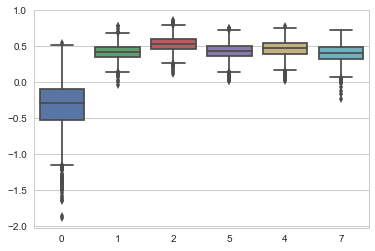

In [28]:
#Can only be run after previous cell has been run
new_feats = np.array(tot_features)
new_feats = new_feats[ignore == 0].tolist()
ax = sns.boxplot(data = stddiff_pd.loc[:, [new_feats[0], new_feats[1], new_feats[2], new_feats[5], new_feats[4], new_feats[7]]]) 
 


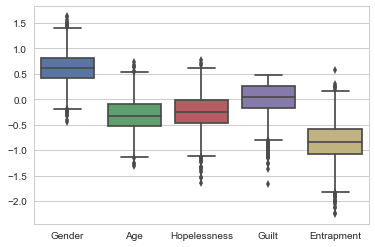

In [55]:
ax = sns.boxplot(data = stddiff_pd.loc[:, [new_feats[3], new_feats[4], new_feats[7], new_feats[8],new_feats[9]]])

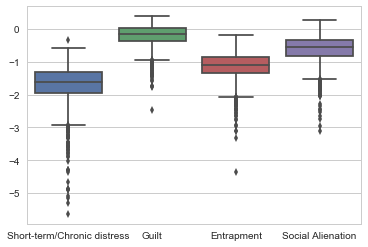

In [23]:
ax = sns.boxplot(data = stddiff_pd.loc[:, [new_feats[5],new_feats[7],new_feats[8],new_feats[9]]])

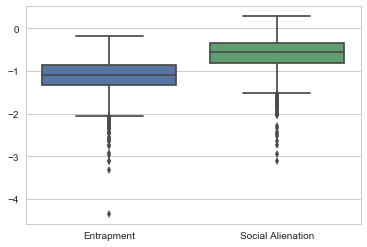

In [33]:
ax = sns.boxplot(data = stddiff_pd.loc[:, new_feats[8]:new_feats[9]])

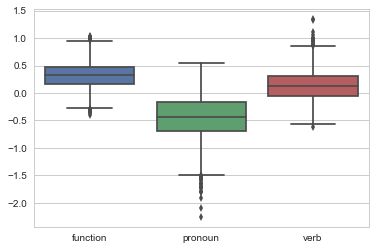

In [19]:
ax = sns.boxplot(data = stddiff_pd.loc[:, new_feats[10]:new_feats[12]])

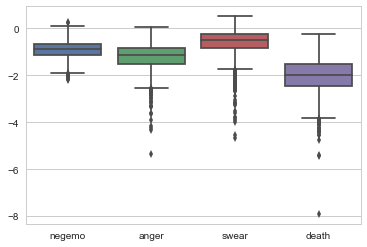

In [26]:
ax = sns.boxplot(data = stddiff_pd.loc[:, [new_feats[15],new_feats[16], new_feats[21], new_feats[25]]])

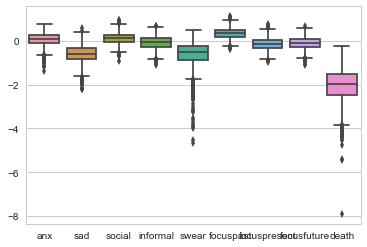

In [21]:
ax = sns.boxplot(data = stddiff_pd.loc[:, new_feats[17]:])

In [68]:
def pearson_corr(df, feature, target='Distress (0) vs. Suicide (1)'): #Pearson Correlation
    #TODO
    corr = scipy.stats.pearsonr(df[feature],df[target])[0]
    return corr

In [69]:
# calculate pearson correlation between features and target
#  and construct a 95% confidence interval
#TODO
target='Distress (0) vs. Suicide (1)'
cname = []
stddiff = []
ignore = []
tot_features = numerical_features
for feature in tot_features:
    df = data.loc[:, [feature, target]]
    m, c_l, c_u, f_val = bootstrap_ci_arg(df, func=pearson_corr, feature=feature)
    print("Correlation (m, c_l, c_u) for "+ feature + " with target is (" + str(m) + ", " + str(c_l) + ", " + str(c_u) + ")")
    if c_l > 0 or c_u < 0:
        print("Statistically significant correlation for feature: " + feature)
    else:
        print("Statistically NOT significant correlation for feature: " + feature)
        
    print("")
        
    cname.append(feature)
    stddiff.append(f_val)
    if (np.isfinite(m) and np.isfinite(c_l) and np.isfinite(c_u)):
        ignore.append(0)
    else:
        ignore.append(1)

stddiff = np.array(stddiff)
ignore = np.array(ignore)
cname = np.array(cname)
cname = cname[ignore == 0]
stddiff = stddiff[ignore == 0]
stddiff = np.transpose(stddiff)
cname = cname.tolist()
stddiff_pd = pd.DataFrame(stddiff,  columns=cname)
import seaborn as sns
sns.set(style="whitegrid")

new_feats = np.array(tot_features)
new_feats = new_feats[ignore == 0].tolist()

Correlation (m, c_l, c_u) for Depression with target is (0.55956486213, 0.374255783179, 0.691095266421)
Statistically significant correlation for feature: Depression

Correlation (m, c_l, c_u) for Self-harm with target is (0.654197276851, 0.495345259849, 0.77916527615)
Statistically significant correlation for feature: Self-harm

Correlation (m, c_l, c_u) for Eye gaze with target is (0.0626780620442, -0.150846335179, 0.249715220833)
Statistically NOT significant correlation for feature: Eye gaze

Correlation (m, c_l, c_u) for Gender with target is (-0.0900180054018, -0.306890547465, 0.12036549699)
Statistically NOT significant correlation for feature: Gender

Correlation (m, c_l, c_u) for Age with target is (0.133004983715, -0.0929320200236, 0.341563007314)
Statistically NOT significant correlation for feature: Age

Correlation (m, c_l, c_u) for Short-term/Chronic distress with target is (0.535154680952, 0.34246309966, 0.713030607447)
Statistically significant correlation for feature: 

c:\users\myste\miniconda3\envs\py36\lib\site-packages\scipy\stats\stats.py:3021: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den
c:\users\myste\miniconda3\envs\py36\lib\site-packages\scipy\stats\stats.py:5277: RuntimeWarning: invalid value encountered in less
  x = np.where(x < 1.0, x, 1.0)  # if x > 1 then return 1.0


Correlation (m, c_l, c_u) for Anhedonia with target is (nan, nan, nan)
Statistically NOT significant correlation for feature: Anhedonia

Correlation (m, c_l, c_u) for Impulsiveness with target is (nan, nan, nan)
Statistically NOT significant correlation for feature: Impulsiveness

Correlation (m, c_l, c_u) for Lability with target is (nan, nan, nan)
Statistically NOT significant correlation for feature: Lability

Correlation (m, c_l, c_u) for Guilt with target is (0.0594564367693, -0.150580394216, 0.283495808433)
Statistically NOT significant correlation for feature: Guilt

Correlation (m, c_l, c_u) for Entrapment with target is (0.403640777881, 0.196718652495, 0.596311183692)
Statistically significant correlation for feature: Entrapment

Correlation (m, c_l, c_u) for Social Alienation with target is (0.210804671685, 0.00555859470983, 0.420749369422)
Statistically significant correlation for feature: Social Alienation



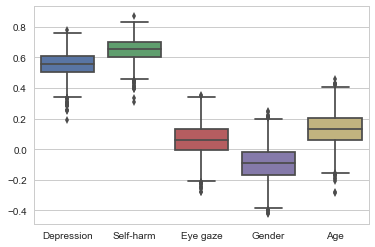

In [71]:
#Run only after running the previous cell
ax = sns.boxplot(data = stddiff_pd.loc[:, :new_feats[4]])

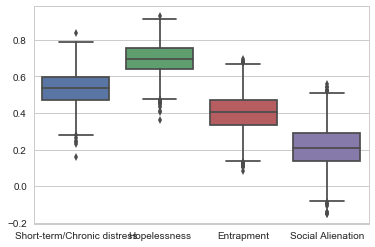

In [74]:
ax = sns.boxplot(data = stddiff_pd.loc[:, [new_feats[5], new_feats[7], new_feats[9], new_feats[10]]])

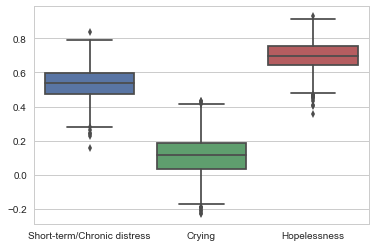

In [47]:
ax = sns.boxplot(data = stddiff_pd.loc[:, new_feats[5]:new_feats[7]])

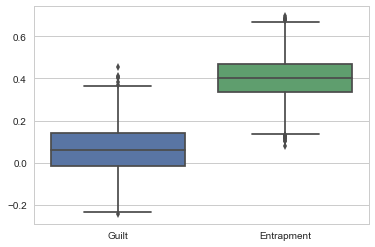

In [49]:
ax = sns.boxplot(data = stddiff_pd.loc[:, new_feats[8]:new_feats[9]])

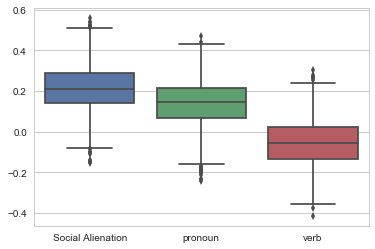

In [50]:
ax = sns.boxplot(data = stddiff_pd.loc[:, new_feats[10]:new_feats[12]])

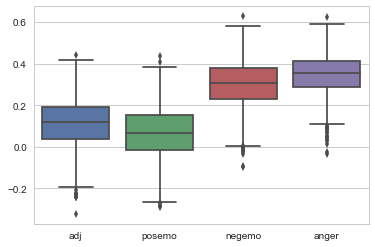

In [51]:
ax = sns.boxplot(data = stddiff_pd.loc[:, new_feats[13]:new_feats[16]])

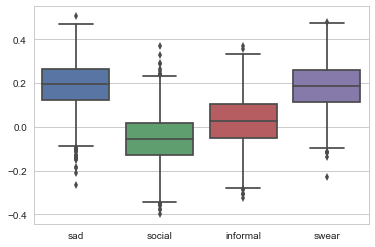

In [53]:
ax = sns.boxplot(data = stddiff_pd.loc[:, new_feats[17]:])

In [54]:
import dython #For nominal correlations Cramer's V and Thiel's U
from dython.nominal import *
def cramers_corr(df, feature, target='Distress (0) vs. Suicide (1)'):
    y = df[feature]
    x = df[target]
    corr =  cramers_v(x, y)
    return corr

def thiels_corr(df, feature, target='Distress (0) vs. Suicide (1)'):
    y = df[feature]
    x = df[target]
    corr =  theils_u(x, y)
    return corr

In [55]:
#import dython #For nominal correlations Cramer's V and Thiel's U
#from dython.nominal import *
#x = data['Distress (0) vs. Suicide (1)']
#y = data['Age']
#cramer_corr = cramers_v(x, y)
#thiels_corr = theils_u(x, y)

#print("Cramer's V correlation is:" + str(cramer_corr))
#print("Thiel's U correlation is:" + str(thiels_corr))

Cramer's V correlation is:0.0
Thiel's U correlation is:0.012536032268675867


In [60]:
target='Distress (0) vs. Suicide (1)'
for feature in numerical_features:
    df = data.loc[:, [feature, target]]
    m, c_l, c_u = bootstrap_ci_arg(df, func=cramers_corr, feature=feature)
    print("Cramers Correlation (m, c_l, c_u) for "+ feature + " with target is (" + str(m) + ", " + str(c_l) + ", " + str(c_u) + ")")
    if m > 0.1:
        print("Statistically significant correlation for feature: " + feature)
    else:
        print("Statistically NOT significant correlation for feature: " + feature)
        
    print("")

Cramers Correlation (m, c_l, c_u) for Depression with target is (0.6534342506562857, 0.4889338683426019, 0.7910535387349912)
Statistically significant correlation for feature: Depression

Cramers Correlation (m, c_l, c_u) for Self-harm with target is (0.8538037014730553, 0.7329870714642377, 0.9416966831232153)
Statistically significant correlation for feature: Self-harm

Cramers Correlation (m, c_l, c_u) for Eye gaze with target is (0.0, 0.0, 0.19735979597606398)
Statistically NOT significant correlation for feature: Eye gaze

Cramers Correlation (m, c_l, c_u) for Gender with target is (0.0, 0.0, 0.2636619672150732)
Statistically NOT significant correlation for feature: Gender

Cramers Correlation (m, c_l, c_u) for Age with target is (0.03555469731537219, 0.0, 0.29864483662906216)
Statistically NOT significant correlation for feature: Age

Cramers Correlation (m, c_l, c_u) for Short-term/Chronic distress with target is (0.5013514780394341, 0.29576659995050164, 0.6819814575074832)
Stati

/home/vasu/.local/lib/python3.7/site-packages/dython/nominal.py:59: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))
/shared/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3405: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
/shared/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


Cramers Correlation (m, c_l, c_u) for Anhedonia with target is (nan, nan, nan)
Statistically NOT significant correlation for feature: Anhedonia

Cramers Correlation (m, c_l, c_u) for Impulsiveness with target is (nan, nan, nan)
Statistically NOT significant correlation for feature: Impulsiveness

Cramers Correlation (m, c_l, c_u) for Lability with target is (nan, nan, nan)
Statistically NOT significant correlation for feature: Lability

Cramers Correlation (m, c_l, c_u) for Guilt with target is (0.0, 0.0, 0.21284687592950297)
Statistically NOT significant correlation for feature: Guilt

Cramers Correlation (m, c_l, c_u) for Entrapment with target is (0.36501181257566073, 0.13412588242823678, 0.5618032327803526)
Statistically significant correlation for feature: Entrapment

Cramers Correlation (m, c_l, c_u) for Social Alienation with target is (0.14470573947993648, 0.0, 0.3739018903610826)
Statistically significant correlation for feature: Social Alienation



In [61]:
target='Distress (0) vs. Suicide (1)'
for feature in numerical_features:
    df = data.loc[:, [feature, target]]
    m, c_l, c_u = bootstrap_ci_arg(df, func=thiels_corr, feature=feature)
    print("Thiel's Correlation (m, c_l, c_u) for "+ feature + " with target is (" + str(m) + ", " + str(c_l) + ", " + str(c_u) + ")")
    if m > 0.1:
        print("Statistically significant correlation for feature: " + feature)
    else:
        print("Statistically NOT significant correlation for feature: " + feature)
        
    print("")

Thiel's Correlation (m, c_l, c_u) for Depression with target is (0.43522744356733595, 0.280659767863535, 0.6328609397469956)
Statistically significant correlation for feature: Depression

Thiel's Correlation (m, c_l, c_u) for Self-harm with target is (0.6974637234330063, 0.4972752518330009, 0.8859966524065301)
Statistically significant correlation for feature: Self-harm

Thiel's Correlation (m, c_l, c_u) for Eye gaze with target is (0.0061225535007508785, 9.741504614595506e-06, 0.060130478042320995)
Statistically NOT significant correlation for feature: Eye gaze

Thiel's Correlation (m, c_l, c_u) for Gender with target is (0.00801853505861519, 1.3698006940028806e-05, 0.07454132787833907)
Statistically NOT significant correlation for feature: Gender

Thiel's Correlation (m, c_l, c_u) for Age with target is (0.014519265411784589, 3.755152399949283e-05, 0.09494024768242679)
Statistically NOT significant correlation for feature: Age

Thiel's Correlation (m, c_l, c_u) for Short-term/Chronic

In [13]:
# estimate a linear regression model to explain the smile_percent variable
#  using the is_female variable, the is_depressed variable, 
#  and their statistical interaction
#TODO
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

#selected_features can contain both categorical and continuous features
selected_features = ['Depression', 'Self-harm', 'Short-term/Chronic distress', 'Hopelessness', 'Entrapment', 'Social Alienation', 'negemo', 'anger']
#X = data[numerical_features].values
X = data[selected_features].values
y = data['Distress (0) vs. Suicide (1)'].values
X2 = sm.add_constant(data[selected_features])
est = sm.OLS(data['Distress (0) vs. Suicide (1)'], X2)
est2 = est.fit()
#print(numerical_features)
print(selected_features)
print(est2.summary())
print(est2.pvalues)


['Depression', 'Self-harm', 'Short-term/Chronic distress', 'Hopelessness', 'Entrapment', 'Social Alienation', 'negemo', 'anger']
                                 OLS Regression Results                                 
Dep. Variable:     Distress (0) vs. Suicide (1)   R-squared:                       0.741
Model:                                      OLS   Adj. R-squared:                  0.716
Method:                           Least Squares   F-statistic:                     29.03
Date:                          Sun, 07 Apr 2019   Prob (F-statistic):           8.72e-21
Time:                                  15:45:31   Log-Likelihood:                0.83737
No. Observations:                            90   AIC:                             16.33
Df Residuals:                                81   BIC:                             38.82
Df Model:                                     8                                         
Covariance Type:                      nonrobust                       

In [9]:
# estimate a linear regression model to explain the smile_percent variable
#  using the is_female variable, the is_depressed variable, 
#  and their statistical interaction

data.rename(columns={"Self-harm": "self_harm", "Short-term/Chronic distress": "short_term_long_term_distress",
                                "Social Alienation": "social_alienation", "Distress (0) vs. Suicide (1)": "distress_vs_suicide"}, inplace=True)
selected_features = ['Depression', 'self_harm', 'short_term_long_term_distress', 'Hopelessness', 'Entrapment', 'social_alienation', 'negemo', 'anger', 'death']

str_features = 'distress_vs_suicide~1'
for f in selected_features:
    str_features += "+" + f
    
res = sm.ols(formula=str_features, data=data).fit()
print(res.summary())
print("\np-values of the regression coeeficients\n")
print(res.pvalues)

AttributeError: module 'statsmodels.api' has no attribute 'ols'

In [14]:
# estimate a linear regression model to explain the smile_percent variable
#  using the is_female variable, the is_depressed variable, 
#  and their statistical interaction
#TODO
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

#selected_features can contain both categorical and continuous features
selected_features = ['Depression', 'Self-harm', 'Short-term/Chronic distress', 'Hopelessness', 'Entrapment', 'Social Alienation', 'negemo', 'anger']
#X = data[numerical_features].values
X = data[selected_features].values
y = data['Distress (0) vs. Suicide (1)'].values
X2 = sm.add_constant(data[selected_features])
est = sm.Logit(data['Distress (0) vs. Suicide (1)'], X2)
est2 = est.fit()
#print(numerical_features)
print(selected_features)
print(est2.summary())
print(est2.pvalues)


Optimization terminated successfully.
         Current function value: 0.114164
         Iterations 10
['Depression', 'Self-harm', 'Short-term/Chronic distress', 'Hopelessness', 'Entrapment', 'Social Alienation', 'negemo', 'anger']
                                Logit Regression Results                                
Dep. Variable:     Distress (0) vs. Suicide (1)   No. Observations:                   90
Model:                                    Logit   Df Residuals:                       81
Method:                                     MLE   Df Model:                            8
Date:                          Sun, 07 Apr 2019   Pseudo R-squ.:                  0.8206
Time:                                  15:46:01   Log-Likelihood:                -10.275
converged:                                 True   LL-Null:                       -57.286
                                                  LLR p-value:                 7.073e-17
                                  coef    std err       